# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)

## Introduction
In this project, stackoverflow developer servey 2020 dataset is being used to study on the behaviour of the developers across the world. 


Here we will try to answer the following question

### 1) What are the major Job Factors the developers evaluate while looking for a job.



In [3]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# gathering data 
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
#Data cleanup and preparation
df_jobfactors=df[df.JobFactors.notna()]
df_jobfactors.JobFactors

0        Languages, frameworks, and other technologies ...
3        Flex time or a flexible schedule;Office enviro...
5        Diversity of the company or organization;Langu...
7        Remote work options;Opportunities for professi...
8        Diversity of the company or organization;Remot...
                               ...                        
64146    Specific department or team I’d be working on;...
64148    Industry that I’d be working in;Languages, fra...
64150    Flex time or a flexible schedule;Languages, fr...
64152    Flex time or a flexible schedule;Languages, fr...
64153    Languages, frameworks, and other technologies ...
Name: JobFactors, Length: 49349, dtype: object

In [6]:
#Split the data categeorized by MainBranch feature
df_jobfactors_non_prof_developers=df_jobfactors[df_jobfactors['MainBranch']!='I am a developer by profession']
df_jobfactors_prof_developers=df_jobfactors[df_jobfactors['MainBranch']=='I am a developer by profession']

In [8]:
#Function to simplify the compact job factor strings of all developers

def getAllJobFactorsWithTotalResponseCount(job_factor_strings):
    '''
    INPUT:
    job_factor_strings - a pandas series holding compacted job factor string responses of developers
    
    OUTPUT:
    X - a pandas series with keys as individual job factors and values as its weights (total response count)
    
    '''
    jobfactors_dict=defaultdict(int)
    for jf in job_factor_strings:
        tmp=jf.split(';')
        for j in tmp:
            jobfactors_dict[j]=jobfactors_dict[j]+1
    
    return pd.Series(jobfactors_dict).sort_values(ascending=False)


In [9]:
#Find all Job factors with its total response count
jobfactors=getAllJobFactorsWithTotalResponseCount(df_jobfactors.JobFactors)
jobfactors

Languages, frameworks, and other technologies I’d be working with         25334
Office environment or company culture                                     21981
Flex time or a flexible schedule                                          21656
Opportunities for professional development                                20421
Remote work options                                                       16411
How widely used or impactful my work output would be                      10277
Industry that I’d be working in                                            7574
Family friendliness                                                        5986
Financial performance or funding status of the company or organization     5892
Specific department or team I’d be working on                              5805
Diversity of the company or organization                                   3387
dtype: int64

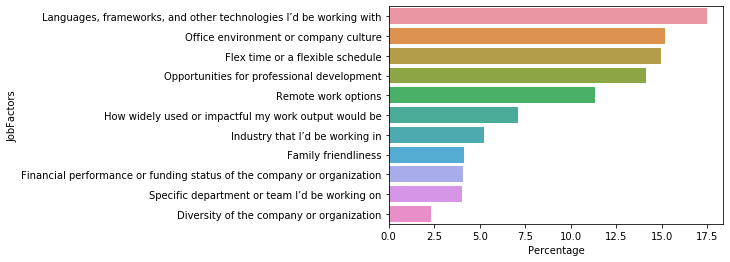

In [10]:
#Plot the Jobfactors Percentage 

jobfactors_perct=(jobfactors*100/jobfactors.sum()).reset_index()
jobfactors_perct.columns=['JobFactors', 'Percentage']
jobfactors_perct

sns_plot=sns.barplot(x='Percentage', y='JobFactors',data=jobfactors_perct)

In [12]:
#Find all Job factors with its total response count for respondents who are not developer by profession
jobfactors_non_prof_developers=getAllJobFactorsWithTotalResponseCount(df_jobfactors_non_prof_developers.JobFactors)
jobfactors_non_prof_developers

Opportunities for professional development                                4856
Office environment or company culture                                     4555
Languages, frameworks, and other technologies I’d be working with         4466
Flex time or a flexible schedule                                          4344
Remote work options                                                       3019
How widely used or impactful my work output would be                      2513
Industry that I’d be working in                                           2124
Specific department or team I’d be working on                             1523
Family friendliness                                                       1462
Financial performance or funding status of the company or organization    1409
Diversity of the company or organization                                   875
dtype: int64

In [14]:
#Find all different Job factors its total response count for respondents who are developer by profession
jobfactors_prof_developers=getAllJobFactorsWithTotalResponseCount(df_jobfactors_prof_developers.JobFactors)
jobfactors_prof_developers

Languages, frameworks, and other technologies I’d be working with         20868
Office environment or company culture                                     17426
Flex time or a flexible schedule                                          17312
Opportunities for professional development                                15565
Remote work options                                                       13392
How widely used or impactful my work output would be                       7764
Industry that I’d be working in                                            5450
Family friendliness                                                        4524
Financial performance or funding status of the company or organization     4483
Specific department or team I’d be working on                              4282
Diversity of the company or organization                                   2512
dtype: int64

In [15]:
#Plot the job factors differences between professional developers and non professinal developers in percentages
jobfactors_non_prof_developers_perct=pd.DataFrame(jobfactors_non_prof_developers*100/jobfactors_non_prof_developers.sum()).reset_index()
jobfactors_non_prof_developers_perct.columns=['JobFactors','non_professional_developers_%']
jobfactors_non_prof_developers_perct.set_index('JobFactors', inplace=True)
jobfactors_non_prof_developers_perct

jobfactors_prof_developers_perct=pd.DataFrame(jobfactors_prof_developers*100/jobfactors_prof_developers.sum()).reset_index()
jobfactors_prof_developers_perct.columns=['JobFactors','professional_developers_%']
jobfactors_prof_developers_perct.set_index('JobFactors', inplace=True)
jobfactors_prof_developers_perct

comp_df = pd.merge(jobfactors_prof_developers_perct, jobfactors_non_prof_developers_perct, left_index=True, right_index=True) 
comp_df['difference_%'] = comp_df['professional_developers_%'] - comp_df['non_professional_developers_%']
comp_df.style.bar(subset=['difference_%'], align='mid', color=['#d65f5f', '#5fba7d'])

,professional_developers_%,non_professional_developers_%,difference_%
JobFactors,,,
"Languages, frameworks, and other technologies I’d be working with",18.3733,14.3389,4.03436
Office environment or company culture,15.3428,14.6247,0.718089
Flex time or a flexible schedule,15.2424,13.9472,1.29517
Opportunities for professional development,13.7042,15.5911,-1.88685
Remote work options,11.791,9.69306,2.09796
How widely used or impactful my work output would be,6.83583,8.06845,-1.23262
Industry that I’d be working in,4.79846,6.8195,-2.02103
Family friendliness,3.98317,4.69402,-0.710856
Financial performance or funding status of the company or organization,3.94707,4.52386,-0.576788
